In [2]:
import numpy as np
from pyspark import SparkContext
sc = SparkContext('local', 'Logistic Regression App')

In [4]:
def y(x, w):
    # TODO: implement logit function
    return 0.5

def loss(data, w):
    predicted = [(t, y(x, w)) for t, x in data]
    return - sum(t * np.log(p) + (1. - t) * np.log(1. - p) for t, p in predicted) / len(data)

In [7]:
def parse_row(line):
    values = list(map(float, line.split(',')))
    return values[0], np.array([1.] + values[1:])

def load_data(path):
    with open(path) as src:
        return [parse_row(r) for r in src]

In [8]:
train_data = load_data('../data/logit_train.csv')
test_data = load_data('../data/logit_test.csv')

In [ ]:
train_data_rdd = sc.parallelize(train_data).persist()

In [9]:
a = 0.1  # learning rate
b = 5e-5 # L2 coefficient, suggested values: 5e-2, 5e-4, 5e-6
w = np.random.rand(3) # model weights

for i in range(10):
    pass
    # TODO: calc gradient using map transformation and reduce action on train_data_rdd
    # TODO: update weights appling L2 regularization
    if i % 25 == 0:
        print(i, loss(train_data, w), loss(test_data, w))
        
# TODO: plot train & test loss values for 1000 iterations for each b from range: [5e-2, 5e-4, 5e-6]

0 0.69314718056 0.69314718056


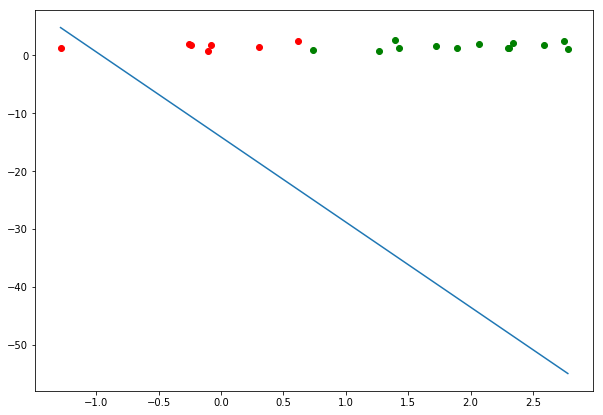

In [10]:
%matplotlib inline
from matplotlib import pyplot as plt

data_0_x1 = [v[1] for t, v in train_data if t == 0]
data_0_x2 = [v[2] for t, v in train_data if t == 0]

data_1_x1 = [v[1] for t, v in train_data if t == 1]
data_1_x2 = [v[2] for t, v in train_data if t == 1]

x1 = sorted([v[1] for t, v in train_data])
x2 = [- w[0] / w[2] - x * w[1] / w[2] for x in x1]

# plot objects and hyperplane
plt.figure(figsize=(10,7))
plt.plot(x1, x2, '-',
         data_0_x1, data_0_x2, 'or',
         data_1_x1, data_1_x2, 'og')